In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode ,iplot
import plotly.io as pio

pio.renderers = "svg"

#### Data : https://birparcatuhaftik.com/corona-virusu-son-dakika-2020/ 
### bu linkte bulunan dünya geneli için olan tabloyu excel kullarak çektim ve bu verileri kullandım.

In [2]:
df = pd.read_csv("covidData.csv", sep = ";")

In [3]:
df.head()

,Ulkeler,Vaka,YeniVaka,Olum,YeniOlum,Iyilesen,Kritik,Test
0,ABD,13278819,29895.0,269802,242.0,7852629,24408,187376424
1,Hindistan,9325786,15915.0,135906,154.0,8733073,8944,137062749
2,Brezilya,6209404,4834.0,171564,67.0,5528599,8318,21900000
3,Rusya,2215533,27543.0,38558,496.0,1712174,2300,74814909
4,Fransa,2183660,NaN,50957,NaN,158236,4018,20224617


In [4]:
df.isnull().sum()

Ulkeler       0
Vaka          0
YeniVaka    113
Olum          0
YeniOlum    140
Iyilesen      0
Kritik        0
Test          0
dtype: int64

In [5]:
df.YeniOlum.fillna(0, inplace = True)
df.YeniVaka.fillna(df.YeniVaka.mean(), inplace = True)

In [6]:
df.isnull().sum()

Ulkeler     0
Vaka        0
YeniVaka    0
Olum        0
YeniOlum    0
Iyilesen    0
Kritik      0
Test        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ulkeler   220 non-null    object 
 1   Vaka      220 non-null    int64  
 2   YeniVaka  220 non-null    float64
 3   Olum      220 non-null    int64  
 4   YeniOlum  220 non-null    float64
 5   Iyilesen  220 non-null    int64  
 6   Kritik    220 non-null    int64  
 7   Test      220 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 13.9+ KB


In [8]:
df.shape

(220, 8)

In [9]:
df.describe()

,Vaka,YeniVaka,Olum,YeniOlum,Iyilesen,Kritik
count,2.200000e+02,220.000000,220.000000,220.000000,2.200000e+02,220.000000
mean,2.801198e+05,3064.317757,6562.768182,30.972727,1.915038e+05,477.600000
std,1.200637e+06,3992.689624,25645.996012,103.375360,8.874590e+05,1989.405662
min,1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.526250e+03,844.500000,27.500000,0.000000,9.280000e+02,0.000000
50%,1.294750e+04,3064.317757,178.000000,0.000000,8.161000e+03,6.500000
75%,1.228018e+05,3064.317757,2003.250000,7.000000,7.095025e+04,127.000000
max,1.327882e+07,29895.000000,269802.000000,827.000000,8.733073e+06,24408.000000


In [23]:
fig = px.scatter(df, x="Vaka", y="Olum",size="Vaka",color='Ulkeler', log_x=0, title='Vaka-Olum Iliskisi')
fig.show()

In [11]:
fig = px.scatter(df, x="Vaka", y="Olum",size="Iyilesen", color='Ulkeler', log_x=1,title='Vaka-Olum-Iyilesen Iliskisi')
fig.show()

In [248]:
data1 = go.Scatter3d(
    x=df.Vaka,
    y=df.Olum,
    z=df.Ulkeler,
    mode='markers',
    marker=dict(
        size=10,
        color=  df.Iyilesen,               # set color to an array/list of desired values      
    )
)

data = [data1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0 
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig);

In [12]:
df_copy = df.copy()
import math

In [13]:
sirali = np.sort(df_copy.Vaka)
max_deger = np.max(sirali)
min_deger = np.min(sirali)
DG = max_deger - min_deger
k = math.ceil(np.sqrt(303))
a = 1
c = (DG+a)/k
print(c)

737712.1666666666


In [14]:
s_alt = np.zeros((k, 1), dtype=np.float)
s_ust = np.zeros((k, 1), dtype=np.float)
s_alt[0] = min_deger
s_ust[0] = s_alt[1]-0.01
for i in range(1, k):
    s_alt[i] = (s_alt[i-1] + c)
s_ust[:] = s_alt[:] + (c-0.01)

In [15]:
#Sınıf orta degeleri bulma
s_ort = np.zeros((k, 1), dtype=np.float)
for i in range(k):
    s_ort[i] = (s_alt[i] + s_ust[i]) / 2

In [16]:
for i in df_copy.Vaka:
    for j in range(k):
        if((s_alt[j]<i) & (i<s_ust[j])):
            z = s_ort[j]
            df_copy.loc[df_copy.Vaka == i, "Vaka"] = int(z)

In [17]:
fig = px.bar(df_copy, x="Vaka", y="Olum", color="Ulkeler", title="Vaka-Olum Iliskisi")
fig.show();

In [67]:
ulke = df.Ulkeler == "Türkiye"

In [68]:
df_ulke = df[ulke]

In [69]:
vaka_sayi = df.Vaka > 500000

In [70]:
cok_vakalar = df[vaka_sayi]

In [71]:
cok_vakalar.head()

,Ulkeler,Vaka,YeniVaka,Olum,YeniOlum,Iyilesen,Kritik,Test
0,ABD,13278819,29895.000000,269802,242.0,7852629,24408,187376424
1,Hindistan,9325786,15915.000000,135906,154.0,8733073,8944,137062749
2,Brezilya,6209404,4834.000000,171564,67.0,5528599,8318,21900000
3,Rusya,2215533,27543.000000,38558,496.0,1712174,2300,74814909
4,Fransa,2183660,3064.317757,50957,0.0,158236,4018,20224617


In [23]:
fig = px.scatter(cok_vakalar, x="Vaka", y="Olum",size="Iyilesen", color='Ulkeler', log_x=1,title='Vaka Sayisi 500.000 uzerinde olan ulkeler')
fig.show()

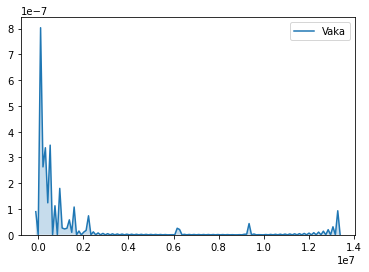

In [24]:
sns.kdeplot(df.Vaka, shade=True);

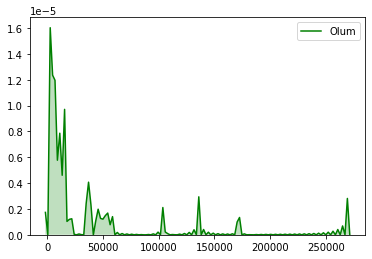

In [25]:
sns.kdeplot(df.Olum, shade=True, color = "green");

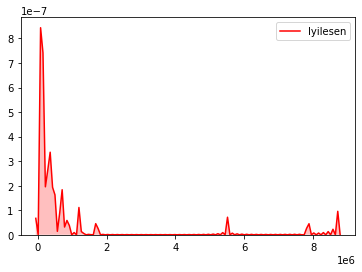

In [26]:
sns.kdeplot(df.Iyilesen, shade=True, color = "red");

In [27]:
vakalar = df_copy[vaka_sayi]

<Figure size 720x720 with 0 Axes>

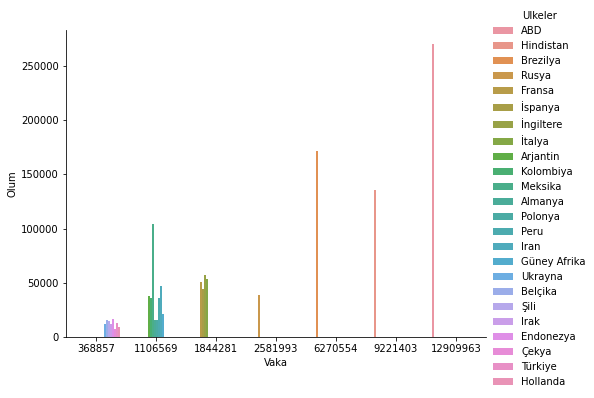

In [28]:
plt.figure(figsize = (10, 10))

sns.catplot(x="Vaka", y="Olum", hue="Ulkeler", kind = "bar",data = vakalar, aspect=11.7/8.27);  # kind = "point" -- alternatif

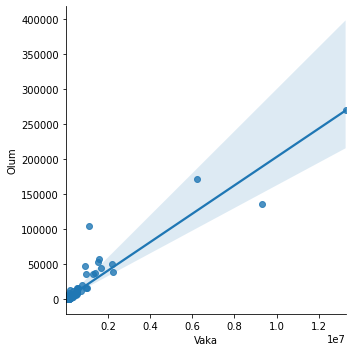

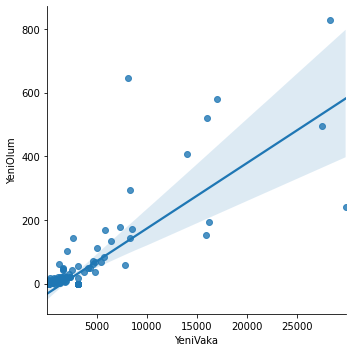

In [29]:
sns.lmplot(x = "Vaka", y = "Olum", data = df);
sns.lmplot(x="YeniVaka", y="YeniOlum", data = df);

In [30]:
df.head()

,Ulkeler,Vaka,YeniVaka,Olum,YeniOlum,Iyilesen,Kritik,Test
0,ABD,13278819,29895.000000,269802,242.0,7852629,24408,187376424
1,Hindistan,9325786,15915.000000,135906,154.0,8733073,8944,137062749
2,Brezilya,6209404,4834.000000,171564,67.0,5528599,8318,21900000
3,Rusya,2215533,27543.000000,38558,496.0,1712174,2300,74814909
4,Fransa,2183660,3064.317757,50957,0.0,158236,4018,20224617


In [31]:
fig = px.scatter(df, x="YeniVaka", y="YeniOlum",size="Kritik", color='Ulkeler', log_x=1,title='YeniVaka-YeniOlum-Kritik Iliskisi')
fig.show()

In [32]:
sirali = np.sort(df_copy.YeniVaka)
max_deger = np.max(sirali)
min_deger = np.min(sirali)
DG = max_deger - min_deger
k = math.ceil(np.sqrt(303))
a = 0.000001
c = (DG+a)/k
print(c)

1660.7777778333334


In [33]:
s_alt = np.zeros((k, 1), dtype=np.float)
s_ust = np.zeros((k, 1), dtype=np.float)
s_alt[0] = min_deger
s_ust[0] = s_alt[1]-0.1
for i in range(1, k):
    s_alt[i] = (s_alt[i-1] + c)
s_ust[:] = s_alt[:] + (c-0.01)

In [34]:
s_ort = np.zeros((k, 1), dtype=np.float)
for i in range(k):
    s_ort[i] = (s_alt[i] + s_ust[i]) / 2

In [35]:
for i in df_copy.YeniVaka:
    for j in range(k):
        if((s_alt[j]<i) & (i<s_ust[j])):
            z = s_ort[j]
            df_copy.loc[df_copy.YeniVaka == i, "YeniVaka"] = int(z)

In [36]:
fig = px.bar(df_copy, x="YeniVaka", y="YeniOlum", color="Ulkeler", title="YeniVaka-YeniOlum Iliskisi")
fig.show();

In [60]:
fig = {
  "data": [
    {
      "values": df.Olum,
      "labels": df.Ulkeler,
      "domain": {"x": [0, .8]},
      "name": "",
      "hoverinfo":"label+percent+name", 
      "hole": .2,  
      "type": "pie"
    },],
  "layout": {
        "title":"Ülkelere Göre Ölüm Oranları",
        
        
    }
}
iplot(fig)

In [105]:
import plotly.figure_factory as ff


fig = ff.create_scatterplotmatrix(cok_vakalar, diag='box', index='Ulkeler',
                                  colormap_type='cat',
                                  height=1100, width=1000)
iplot(fig)

In [112]:
data1 = go.Scatter(
    x=cok_vakalar.Ulkeler,
    y=cok_vakalar.Vaka,
    name = "Vakalar",
    marker = dict(color = 'rgb(0,128,0)'),
)

data2 = go.Scatter(
    x=cok_vakalar.Ulkeler,
    y=cok_vakalar.Olum,
    xaxis='x2',
    yaxis='y2',
    name = "Ölümler",
    marker = dict(color = 'rgb(255, 0, 0)'),
)
data = [data1, data2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Vaka Sayısı 500 ve Üzeri Ülkelerdeki Vaka - Ölüm Oranları'

)

fig = go.Figure(data=data, layout=layout) # veri ve düzeni içerir
iplot(fig)

In [128]:
data1 = go.Scatter3d(
    x=cok_vakalar.Vaka,
    y=cok_vakalar.Olum,
    z=cok_vakalar.Ulkeler,
    mode='markers',
    marker=dict(
        size=8,
        color='rgb(0,128,128)',             
    )
)

data = [data1]
layout = go.Layout(
    margin=dict(      
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [137]:
cok_vakalar.head()

,Ulkeler,Vaka,YeniVaka,Olum,YeniOlum,Iyilesen,Kritik,Test
0,ABD,13278819,29895.000000,269802,242.0,7852629,24408,187376424
1,Hindistan,9325786,15915.000000,135906,154.0,8733073,8944,137062749
2,Brezilya,6209404,4834.000000,171564,67.0,5528599,8318,21900000
3,Rusya,2215533,27543.000000,38558,496.0,1712174,2300,74814909
4,Fransa,2183660,3064.317757,50957,0.0,158236,4018,20224617


In [146]:
data1 = go.Scatter(
    x=cok_vakalar.Ulkeler,
    y=cok_vakalar.Vaka,
    name = "Vakalar",
    marker = dict(color = 'rgb(0,128,0)'),
)

data2 = go.Scatter(
    x=cok_vakalar.Ulkeler,
    y=cok_vakalar.Olum,
    xaxis='x2',
    yaxis='y2',
    name = "Ölümler",
    marker = dict(color = 'rgb(255, 0, 0)'),
)

data3 = go.Scatter(
    x=cok_vakalar.Ulkeler,
    y=cok_vakalar.Iyilesen,
    name = "İyileşenler",
    marker = dict(color = 'rgb(17, 77, 195)'),
)

data4 = go.Scatter(
    x=cok_vakalar.Ulkeler,
    y=cok_vakalar.YeniVaka,
    name = "Yeni Vakalar",
    marker = dict(color = 'rgb(218, 193, 108)'),
)

data5 = go.Scatter(
    x=cok_vakalar.Ulkeler,
    y=cok_vakalar.YeniOlum,
    xaxis='x2',
    yaxis='y2',
    name = "Yeni Ölümler",
    marker = dict(color = 'rgb(154, 97, 23)'),
)

data = [data1, data2, data3, data4, data5]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Vaka Sayısı 500 ve Üzeri Ülkelerdeki Durumlar'

)

fig = go.Figure(data=data, layout=layout) # veri ve düzeni içerir
iplot(fig)